In [145]:
from astroquery.sdss import SDSS
query = "SELECT top 100 s.z,s.zErr,p.petroMag_g,p.petroMagErr_g FROM PhotoObjAll p JOIN SpecObjAll s ON s.bestObjID = p.objID WHERE s.z BETWEEN 0.3 and 0.4 AND s.zWarning = 0"
res = SDSS.query_sql(query)
print(res)

    z         zErr     petroMag_g petroMagErr_g
--------- ------------ ---------- -------------
0.3996509 8.262814e-05   20.98587     0.2454422
0.3120482 4.213554e-05   20.04041     0.1431266
0.3666104 7.413001e-05   21.00696     0.1256348
0.3667448 6.554875e-05   21.00696     0.1256348
0.3066034 1.563702e-05   20.86995     0.1177513
0.3065799 1.547027e-05   20.86995     0.1177513
0.3096744  4.39658e-05   20.72285    0.05893046
0.3097279  4.31044e-05   20.72285    0.05893046
0.3311663 7.942448e-05   19.78041     0.2739696
0.3492885 0.0001369813   21.08255     0.1900997
      ...          ...        ...           ...
0.3761874 0.0001552924   20.97589     0.1141727
0.3764592 0.0001639836   20.97589     0.1141727
 0.375562 3.289418e-05   20.59763    0.09121991
 0.374992 0.0002270933   19.89297     0.2041507
0.3748533 0.0001318211   19.89297     0.2041507
0.3237897 0.0001222228   21.14897     0.2550436
0.3251925 0.0001337081   21.27147     0.1647035
0.3253638 0.0001112114   21.27147     0.

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [147]:
query = "SELECT top 10 s.z FROM PhotoObjAll p JOIN SpecObjAll s ON s.bestObjID = p.objID WHERE s.z BETWEEN 0.3 and 0.4 AND s.zWarning = 0 ORDER BY s.z"
x = SDSS.query_sql(query)
x = np.array(x)
print (x)

[(0.3000001,) (0.3000009,) (0.3000009,) (0.3000012,) (0.3000018,)
 (0.3000027,) (0.3000027,) (0.3000033,) (0.3000035,) (0.3000037,)]


In [148]:
query = "SELECT top 10 p.petroMag_g FROM PhotoObjAll p JOIN SpecObjAll s ON s.bestObjID = p.objID WHERE s.z BETWEEN 0.3 and 0.4 AND s.zWarning = 0 ORDER BY s.z"
y = SDSS.query_sql(query)

print (y)

petroMag_g
----------
  20.43757
   19.7899
  21.12233
  20.77841
  19.85207
   20.1519
  19.63887
  21.54859
  19.57282
  22.90334


<function matplotlib.pyplot.show(*args, **kw)>

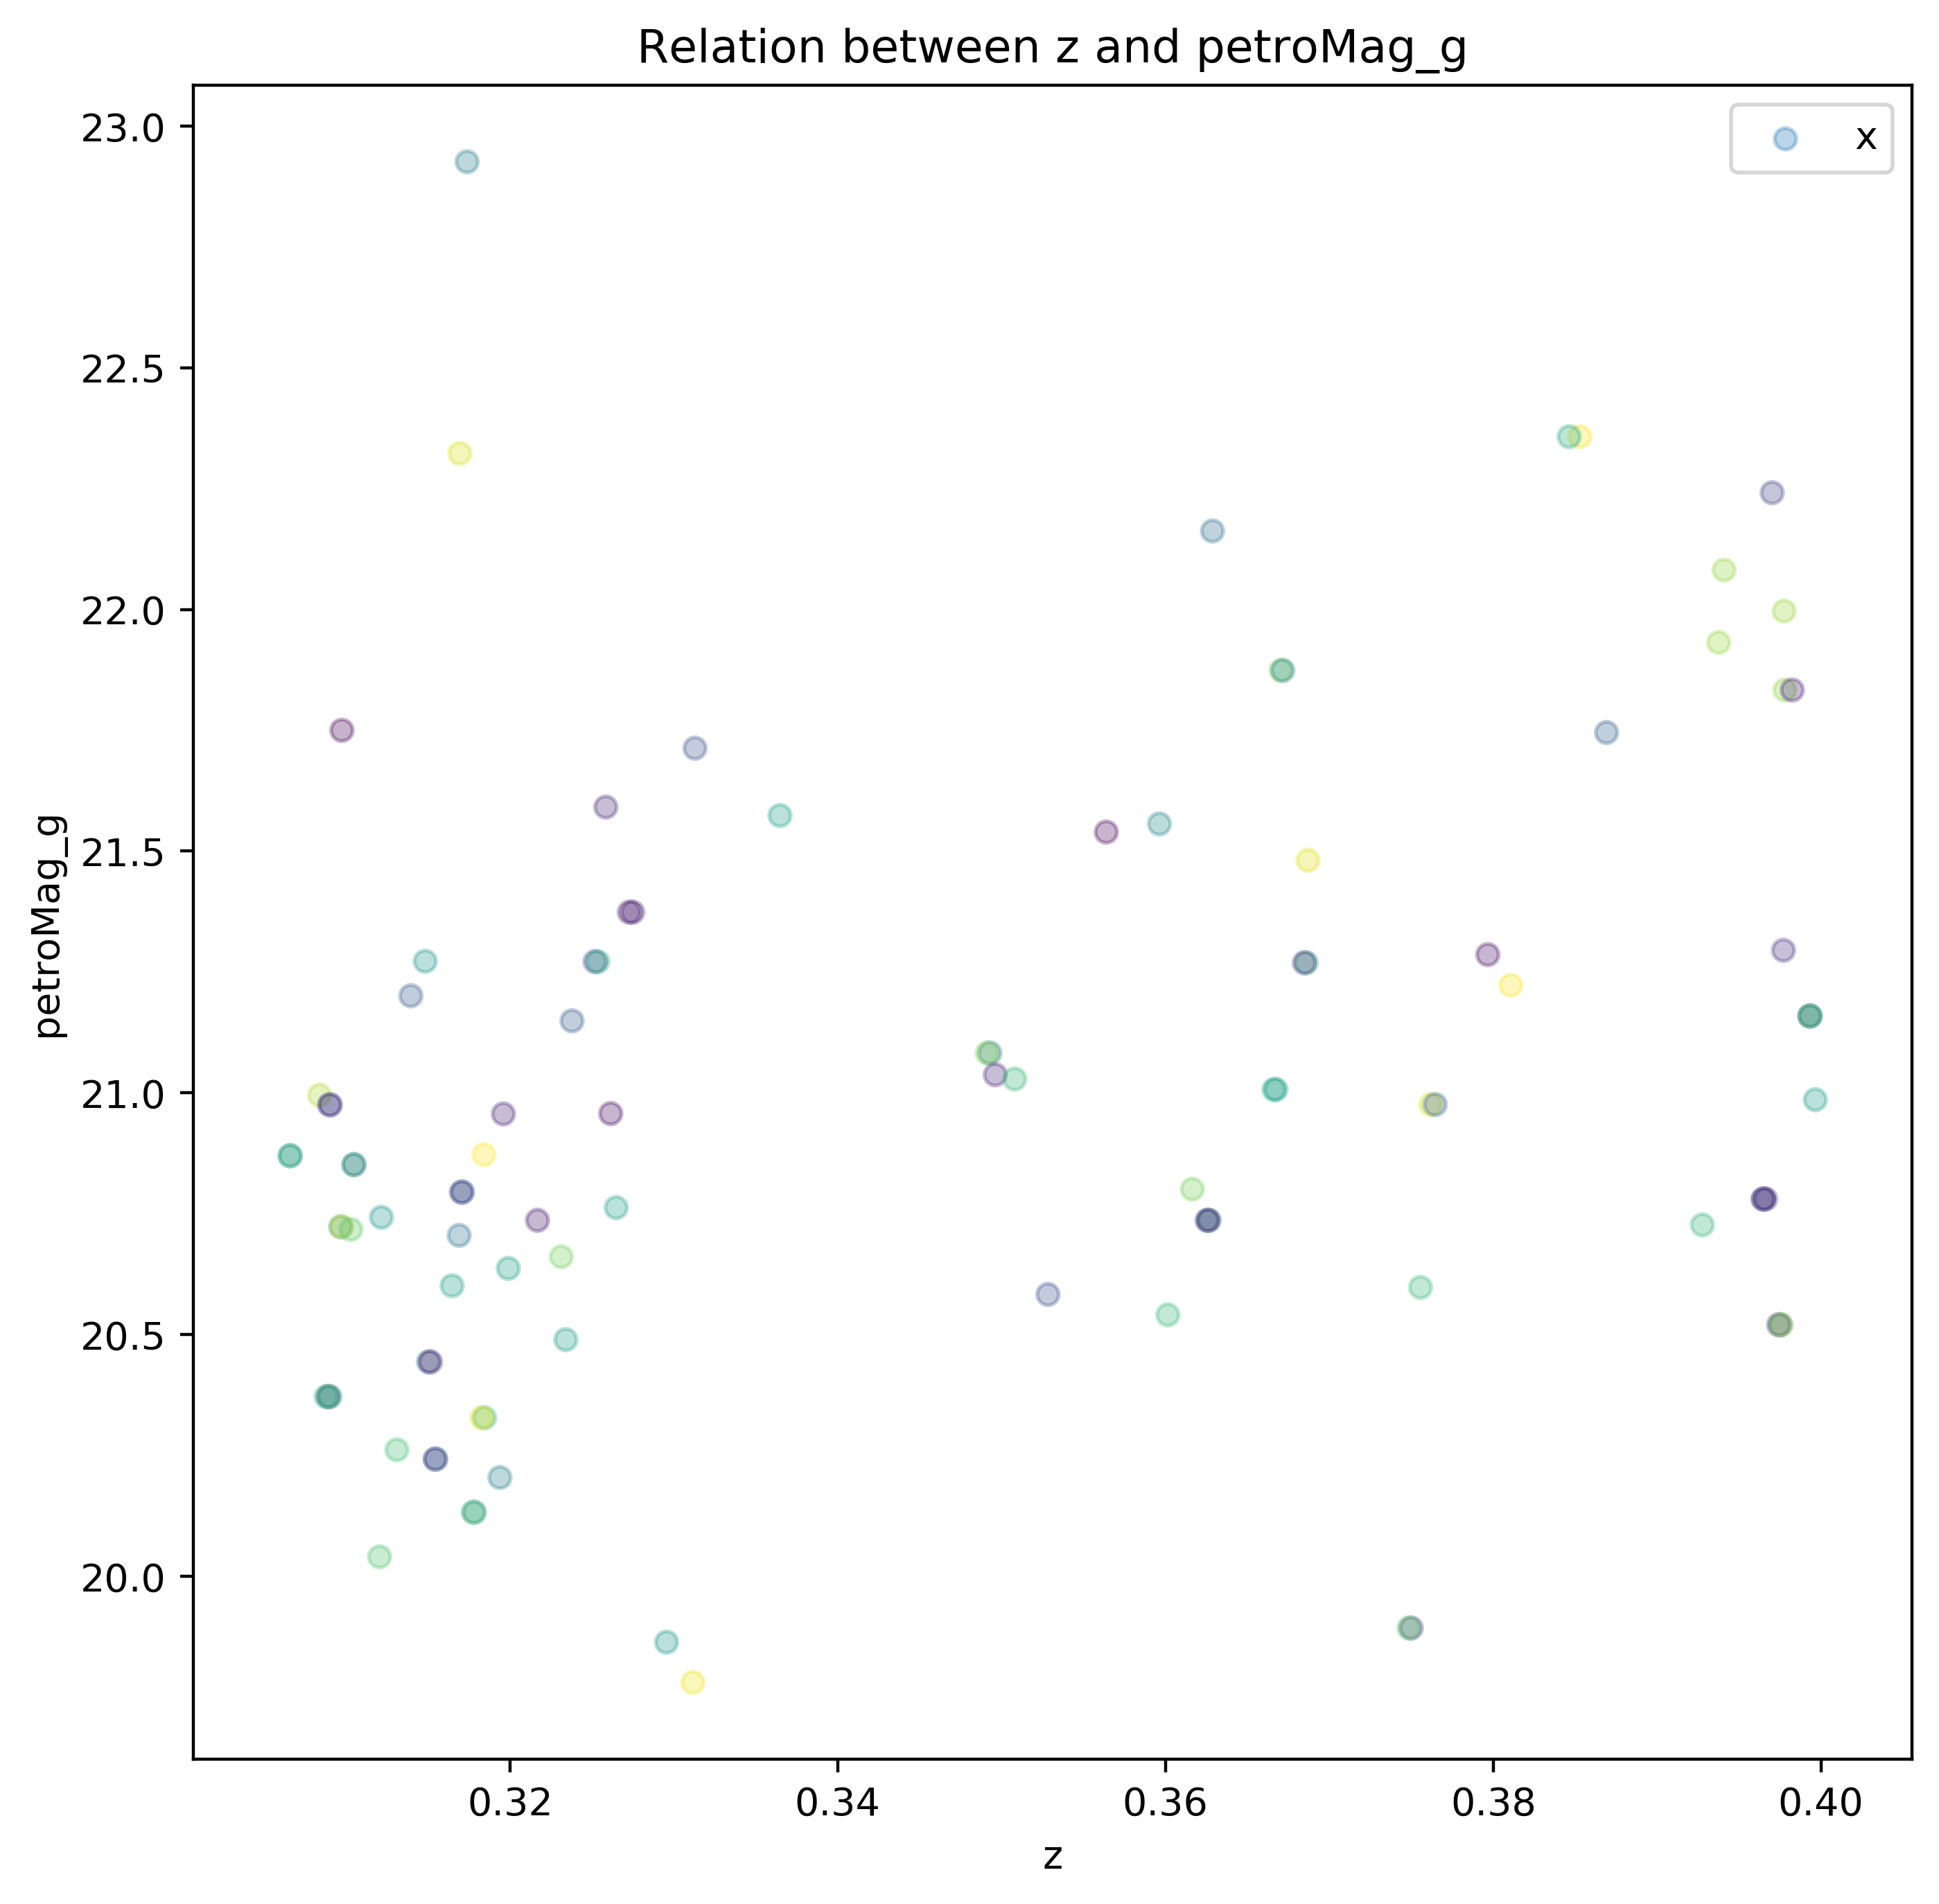

In [155]:
figure(num=None, figsize=(8, 8), dpi=400, facecolor='w', edgecolor='k')
rng = np.random.RandomState(0)
colors = rng.rand(100)
area = np.pi*10

# Plot
plt.scatter(res['z'],res['petroMag_g'],alpha=0.3,c=colors,s=area,cmap='viridis')
plt.legend(['x','y'])
plt.xscale("linear")
plt.yscale("linear")
plt.xlabel('z')
plt.ylabel('petroMag_g')
plt.title("Relation between z and petroMag_g")
plt.show